In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio


df = pd.read_csv('/Users/timl/Datasets/dataset_olympics.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [33]:
#How difficult is it to recieve a medal as a competitor in the Olympics?

# of athelete entries
total_athletes = df.shape[0]

# number of medal winning entries
medal_winners = df.dropna(subset=['Medal']).shape[0]

#proportion of medal winners 
percentage_medal_winners = (medal_winners / total_athletes) * 100
print(f"Total athlete entries: {total_athletes}")
print(f"Total medal winners: {medal_winners}")
print(f"Percentage of medal winners: {percentage_medal_winners:.2f}%")

Total athlete entries: 70000
Total medal winners: 9690
Percentage of medal winners: 13.84%


In [37]:
#Lets do some more calculations medal winners to see if we notice anything

#male vs female participants
gender_counts = df['Sex'].value_counts()
print(f"Number of male participants: {gender_counts.get('M', 0)}")
print(f"Number of female participants: {gender_counts.get('F', 0)}")

#filter for medalists M/F
medalist_gender_counts = df.dropna(subset=['Medal'])['Sex'].value_counts()
#ratios of medalists to total participants for each gender
male_ratio = (medalist_gender_counts.get('M', 0) / gender_counts.get('M', 1)) * 100
female_ratio = (medalist_gender_counts.get('F', 0) / gender_counts.get('F', 1)) * 100

print(f"\nMedalists by gender: {medalist_gender_counts}")
print(f"\nMale Medalists Ratio: {male_ratio}")
print(f"\nFemale Medalists Ratio: {female_ratio}")

Number of male participants: 51877
Number of female participants: 18123

Medalists by gender: Sex
M    7091
F    2599
Name: count, dtype: int64

Male Medalists Ratio: 13.668870597760085

Female Medalists Ratio: 14.340892788169729


In [42]:
#how about since 1980? any difference in this data

# Filter the dataset for entries from 1980 onward
df_since_1980 = df[df['Year'] >= 1980]

# Count the total number of male and female participants since 1980
total_gender_counts_1980 = df_since_1980['Sex'].value_counts()

# Filter for medalists and count male and female medalists since 1980
medalist_gender_counts_1980 = df_since_1980.dropna(subset=['Medal'])['Sex'].value_counts()

# Calculate the ratios of medalists to total participants for each gender since 1980
male_ratio_1980 = (medalist_gender_counts_1980.get('M', 0) / total_gender_counts_1980.get('M', 1)) * 100
female_ratio_1980 = (medalist_gender_counts_1980.get('F', 0) / total_gender_counts_1980.get('F', 1)) * 100

# Output the results
print("Total Participants by Gender Since 1980:")
print(total_gender_counts_1980)

print("\nMedalists by Gender Since 1980:")
print(medalist_gender_counts_1980)

print(f"\nMale medalists ratio since 1980: {male_ratio_1980:.2f}%")
print(f"Female medalists ratio since 1980: {female_ratio_1980:.2f}%")


Total Participants by Gender Since 1980:
Sex
M    26108
F    14024
Name: count, dtype: int64

Medalists by Gender Since 1980:
Sex
M    3128
F    2065
Name: count, dtype: int64

Male medalists ratio since 1980: 11.98%
Female medalists ratio since 1980: 14.72%


In [44]:
# we can look at physcial appearnce as well

#Drop rows with missing Height, Weight, or Medal
df_cleaned = df.dropna(subset=['Height', 'Weight', 'Medal']).copy()

# Define bins for height (in cm) and weight (in kg)
height_bins = [0, 160, 170, 180, 190, 200, 250]
height_labels = [
    '<160cm (<5ft 3in)', '160-169cm (5ft 3in-5ft 7in)', '170-179cm (5ft 7in-5ft 11in)', 
    '180-189cm (5ft 11in-6ft 2in)', '190-199cm (6ft 2in-6ft 6in)', '200cm+ (6ft 6in+)'
]

weight_bins = [0, 50, 60, 70, 80, 90, 100, 150]
weight_labels = [
    '<50kg (<110lbs)', '50-59kg (110-132lbs)', '60-69kg (132-154lbs)', 
    '70-79kg (154-176lbs)', '80-89kg (176-198lbs)', '90-99kg (198-220lbs)', '100kg+ (220lbs+)'
]

# Categorize athletes by height and weight
df_cleaned['Height Category'] = pd.cut(df_cleaned['Height'], bins=height_bins, labels=height_labels, right=False)
df_cleaned['Weight Category'] = pd.cut(df_cleaned['Weight'], bins=weight_bins, labels=weight_labels, right=False)

# Calculate the number of medals won within each height and weight category
height_medal_counts = df_cleaned.groupby('Height Category')['Medal'].count().reset_index(name='Medal Count')
weight_medal_counts = df_cleaned.groupby('Weight Category')['Medal'].count().reset_index(name='Medal Count')

# Display the summarized statistics
print("Medal Counts by Height Category (in cm and ft):")
print(height_medal_counts)

print("\nMedal Counts by Weight Category (in kg and lbs):")
print(weight_medal_counts)


Medal Counts by Height Category (in cm and ft):
                Height Category  Medal Count
0             <160cm (<5ft 3in)          268
1   160-169cm (5ft 3in-5ft 7in)         1194
2  170-179cm (5ft 7in-5ft 11in)         2418
3  180-189cm (5ft 11in-6ft 2in)         2177
4   190-199cm (6ft 2in-6ft 6in)          861
5             200cm+ (6ft 6in+)          188

Medal Counts by Weight Category (in kg and lbs):
        Weight Category  Medal Count
0       <50kg (<110lbs)          227
1  50-59kg (110-132lbs)          975
2  60-69kg (132-154lbs)         1613
3  70-79kg (154-176lbs)         1963
4  80-89kg (176-198lbs)         1318
5  90-99kg (198-220lbs)          652
6      100kg+ (220lbs+)          348


/var/folders/fn/3w5085ns7nv4v62cfvj7m9sm0000gp/T/ipykernel_55604/2138428556.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/fn/3w5085ns7nv4v62cfvj7m9sm0000gp/T/ipykernel_55604/2138428556.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



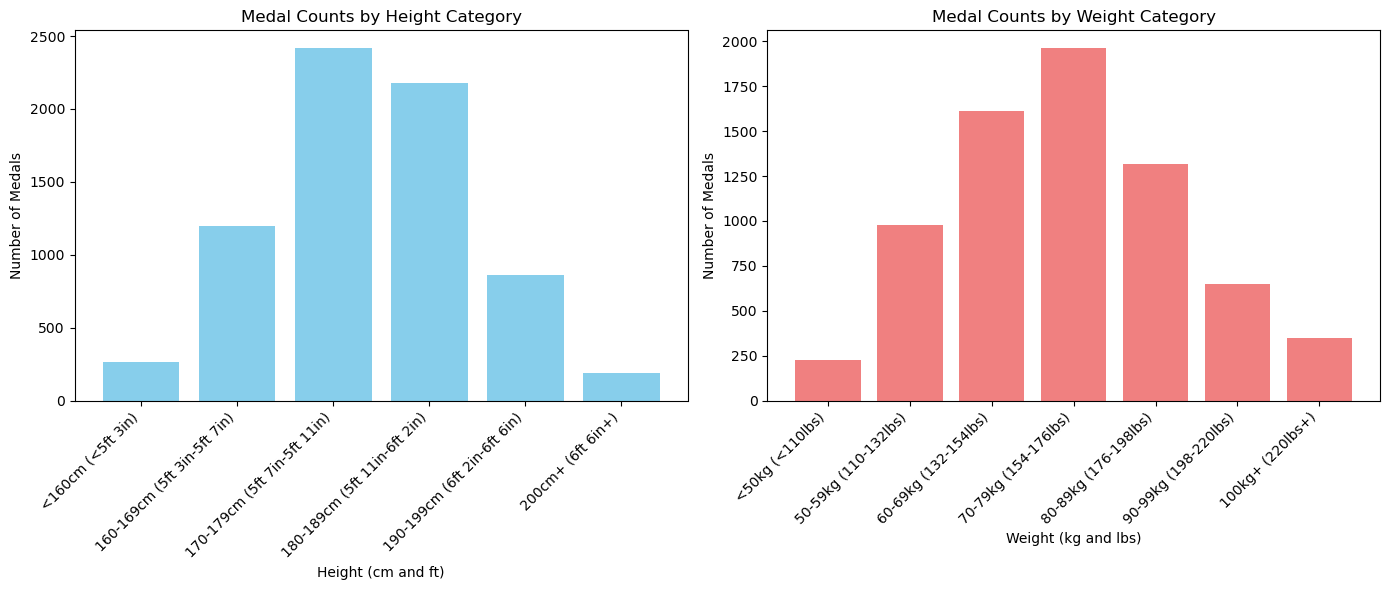

In [46]:
#lets see what it looks like..

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(height_medal_counts['Height Category'], height_medal_counts['Medal Count'], color='skyblue')
plt.title('Medal Counts by Height Category')
plt.xlabel('Height (cm and ft)')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(weight_medal_counts['Weight Category'], weight_medal_counts['Medal Count'], color='lightcoral')
plt.title('Medal Counts by Weight Category')
plt.xlabel('Weight (kg and lbs)')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

/var/folders/fn/3w5085ns7nv4v62cfvj7m9sm0000gp/T/ipykernel_55604/3198728342.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  medal_count_by_age = df_cleaned.pivot_table(index='Age Group', columns='Medal', aggfunc='size', fill_value=0)


<Figure size 1400x700 with 0 Axes>

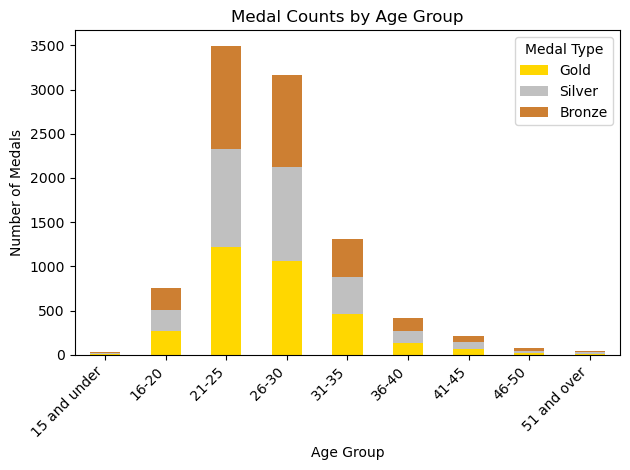

In [4]:
#Medals by age group

df_cleaned = df.dropna(subset=['Age', 'Medal']).copy()

bins = [0, 15, 20, 25, 30, 35, 40, 45, 50, 100]
labels = ['15 and under', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51 and over']
df_cleaned['Age Group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

medal_count_by_age = df_cleaned.pivot_table(index='Age Group', columns='Medal', aggfunc='size', fill_value=0)

medal_count_by_age = medal_count_by_age[['Gold', 'Silver', 'Bronze']]

colors = ['#FFD700', '#C0C0C0', '#CD7F32']  #Gold, silver, bronze

plt.figure(figsize=(14,7))
medal_count_by_age.plot(kind='bar', stacked=True, color=colors)
plt.title('Medal Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [5]:
#pretty much expected, although suprising there is some older winners. I wonder what sports they were competing in..

In [6]:

older_threshold = 35

older_medalists = df_cleaned[(df_cleaned['Age'] > older_threshold)] #filter for older athletes

#count medals by sport
medals_by_sport = older_medalists['Sport'].value_counts().reset_index()
medals_by_sport.columns = ['Sport', 'Total Medals']
print(medals_by_sport)

                   Sport  Total Medals
0          Equestrianism           113
1                Fencing            97
2                Sailing            95
3               Shooting            90
4                Archery            32
5                 Rowing            20
6       Art Competitions            20
7                Curling            14
8                 Tennis            13
9                   Polo            11
10               Cycling            11
11             Bobsleigh            11
12              Canoeing            10
13             Athletics             8
14            Ice Hockey             6
15                Hockey             6
16              Biathlon             5
17  Cross Country Skiing             5
18             Wrestling             4
19            Volleyball             4
20            Tug-Of-War             4
21            Basketball             4
22            Water Polo             4
23              Alpinism             3
24              Handball 

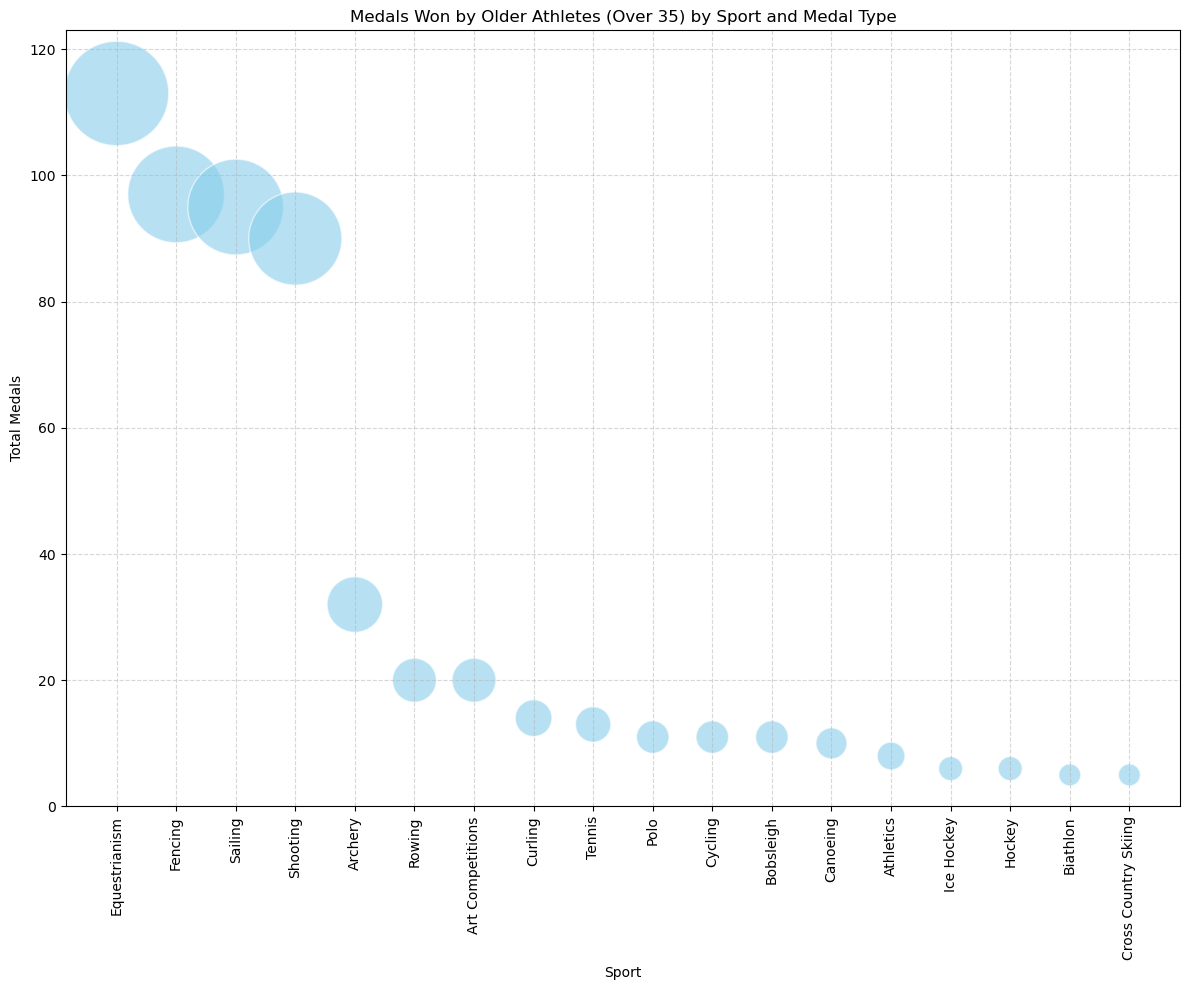

In [7]:
charted_medals = medals_by_sport[medals_by_sport['Total Medals'] >= 5]




plt.figure(figsize=(12, 10))
plt.scatter(charted_medals['Sport'], charted_medals['Total Medals'], s=charted_medals['Total Medals']*50, alpha=0.6, edgecolors='w', color='skyblue')
plt.title('Medals Won by Older Athletes (Over 35) by Sport')
plt.xlabel('Sport')
plt.ylabel('Total Medals')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize= 10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.ylim(charted_medals['Total Medals'].min() -5, charted_medals['Total Medals'].max() +10)

plt.tight_layout()
plt.show()

In [8]:
#less physically demanding competitions? Equestrian, fencing, sailing, shooting, archery, etc

In [21]:
#Nevermind the senior competitors. Let's see how countries have performed over time:


# Data Cleaning: Drop rows with missing Year, NOC, or Medal
df_cleaned = df.dropna(subset=['Year', 'NOC', 'Medal']).copy()
df_cleaned = df_cleaned[df_cleaned['Year'] >= 1960]   #Filter for Post-1960 data

#combine USSR (URS) and Russia (RUS)
df_cleaned['NOC'] = df_cleaned['NOC'].replace('URS', 'RUS')

#total number of medals by country
medals_by_country = df_cleaned['NOC'].value_counts().reset_index()
medals_by_country.columns = ['Country', 'Total Medals']

# Sort the countries by total medals and select the top 50
top_countries = medals_by_country.sort_values(by='Total Medals', ascending=False).head(50)
print("Countries with the most medals since 1960: ")
print(top_countries)
print("Note: USR and RUS medals have been combined in this dataset.")

Countries with the most medals since 1960: 
   Country  Total Medals
0      USA          1007
1      RUS           668
2      ITA           387
3      AUS           327
4      GER           297
5      FRA           280
6      GBR           255
7      CAN           255
8      GDR           203
9      ROU           192
10     NED           176
11     HUN           169
12     ESP           165
13     BRA           161
14     NOR           149
15     SWE           138
16     CHN           122
17     FRG           119
18     CUB           107
19     SUI            85
20     POL            75
21     NZL            71
22     YUG            70
23     ARG            69
24     BUL            68
25     TCH            64
26     DEN            57
27     KOR            53
28     EUN            52
29     JPN            50
30     JAM            46
31     PAK            41
32     NGR            38
33     UKR            38
34     AUT            36
35     BLR            32
36     CRO            31
37    

In [31]:
pio.renderers.default = 'iframe'


df_cleaned = df.dropna(subset=['Year', 'NOC', 'Medal']).copy()
df_cleaned['NOC'] = df_cleaned['NOC'].replace('URS', 'RUS')


medals_by_country = df_cleaned['NOC'].value_counts().reset_index()
medals_by_country.columns = ['Country', 'Total Medals']

top_countries = medals_by_country.sort_values(by='Total Medals', ascending=False).head(10)['Country'].tolist()

# Filter data for top countries and prepare it for plotting
country_performance = df_cleaned[df_cleaned['NOC'].isin(top_countries)].pivot_table(
    index='Year', columns='NOC', aggfunc='size', fill_value=0).reset_index()

# Melt the data (
country_performance_melted = country_performance.melt(id_vars='Year', var_name='Country', value_name='Medals') 

country_performance_melted['Cumulative Medals'] = country_performance_melted.groupby('Country')['Medals'].cumsum()

fig = px.line(country_performance_melted, x='Year', y='Cumulative Medals', color='Country',
              facet_col='Country', facet_col_wrap=5,
              title='Cumulative Medal Counts Over Time for Top Countries',
              labels={'Cumulative Medals': 'Cumulative Number of Medals'})

##center main title and update facet titles -- prior to this individual titles were "Country=USA"
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[-1]))
fig.update_layout(title={'text': 'Cumulative Medal Counts Over Time for Top Countries', 'x': 0.5, 'xanchor': 'center'})

fig.update_layout(width=1000, height=600, showlegend=False)

fig.show()

In [ ]:
# these are the countries you want to be from in order to medal (especially the USA). 
# further thoughts - why is this? population based? waelthiest countries? more opportunity to train in wealthier countries 



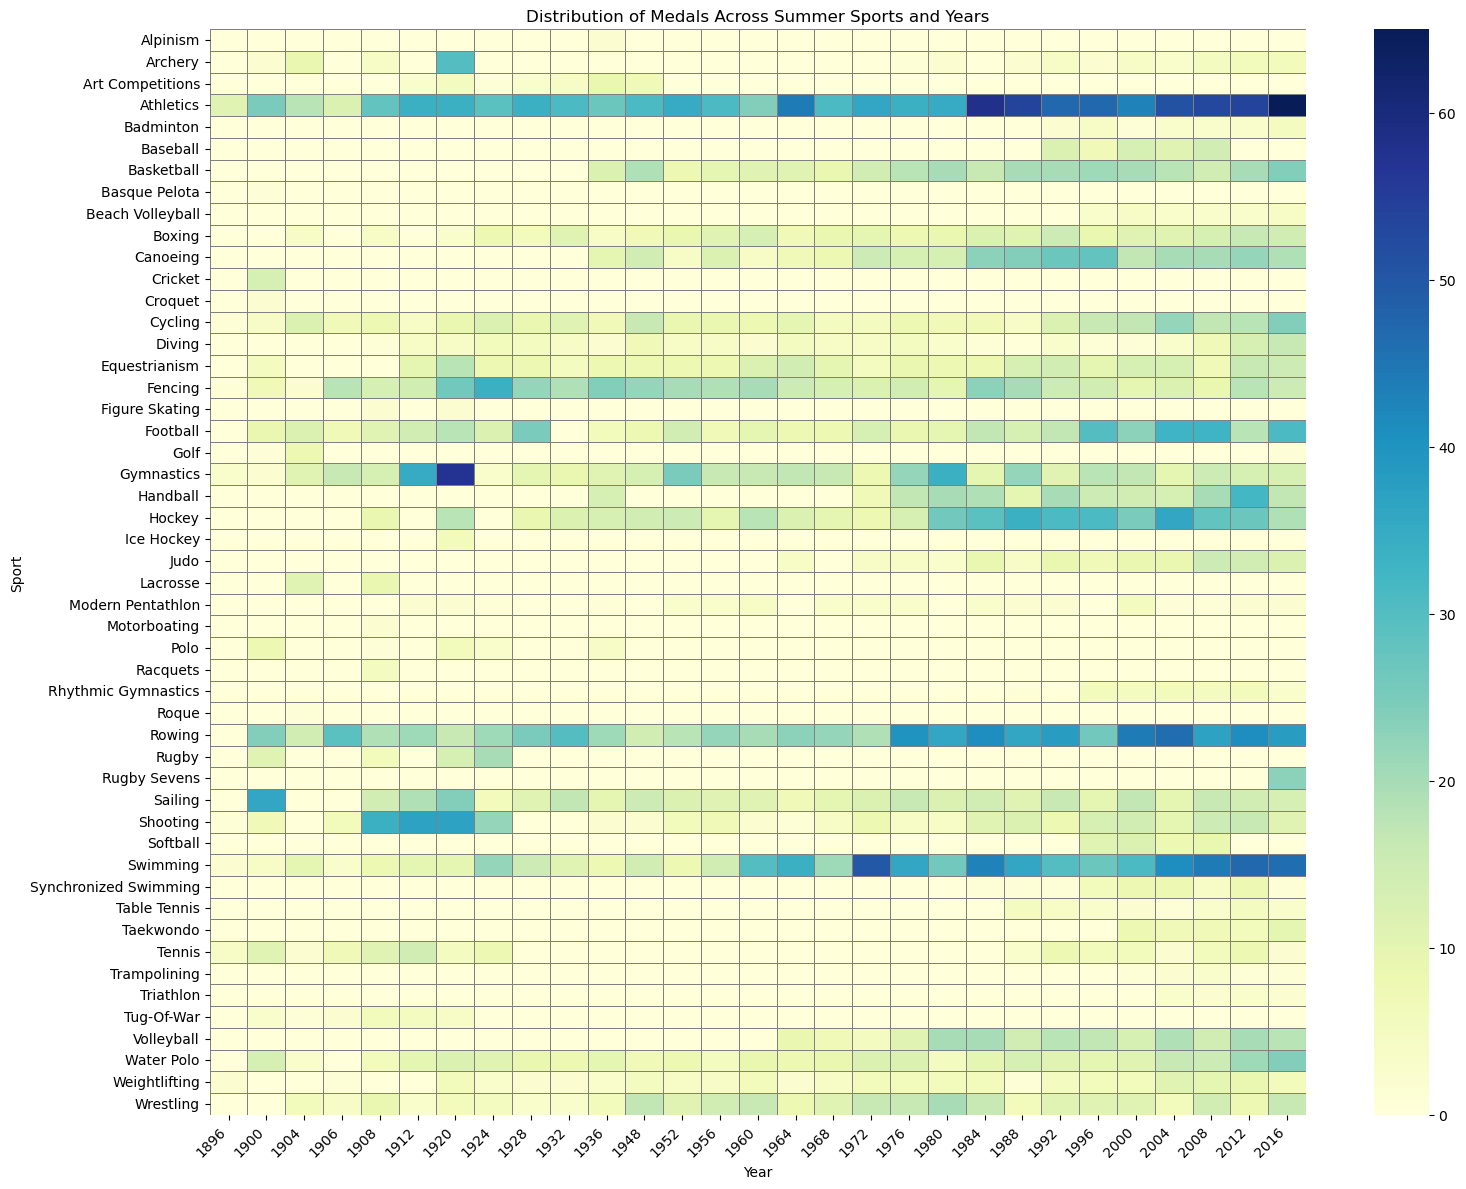

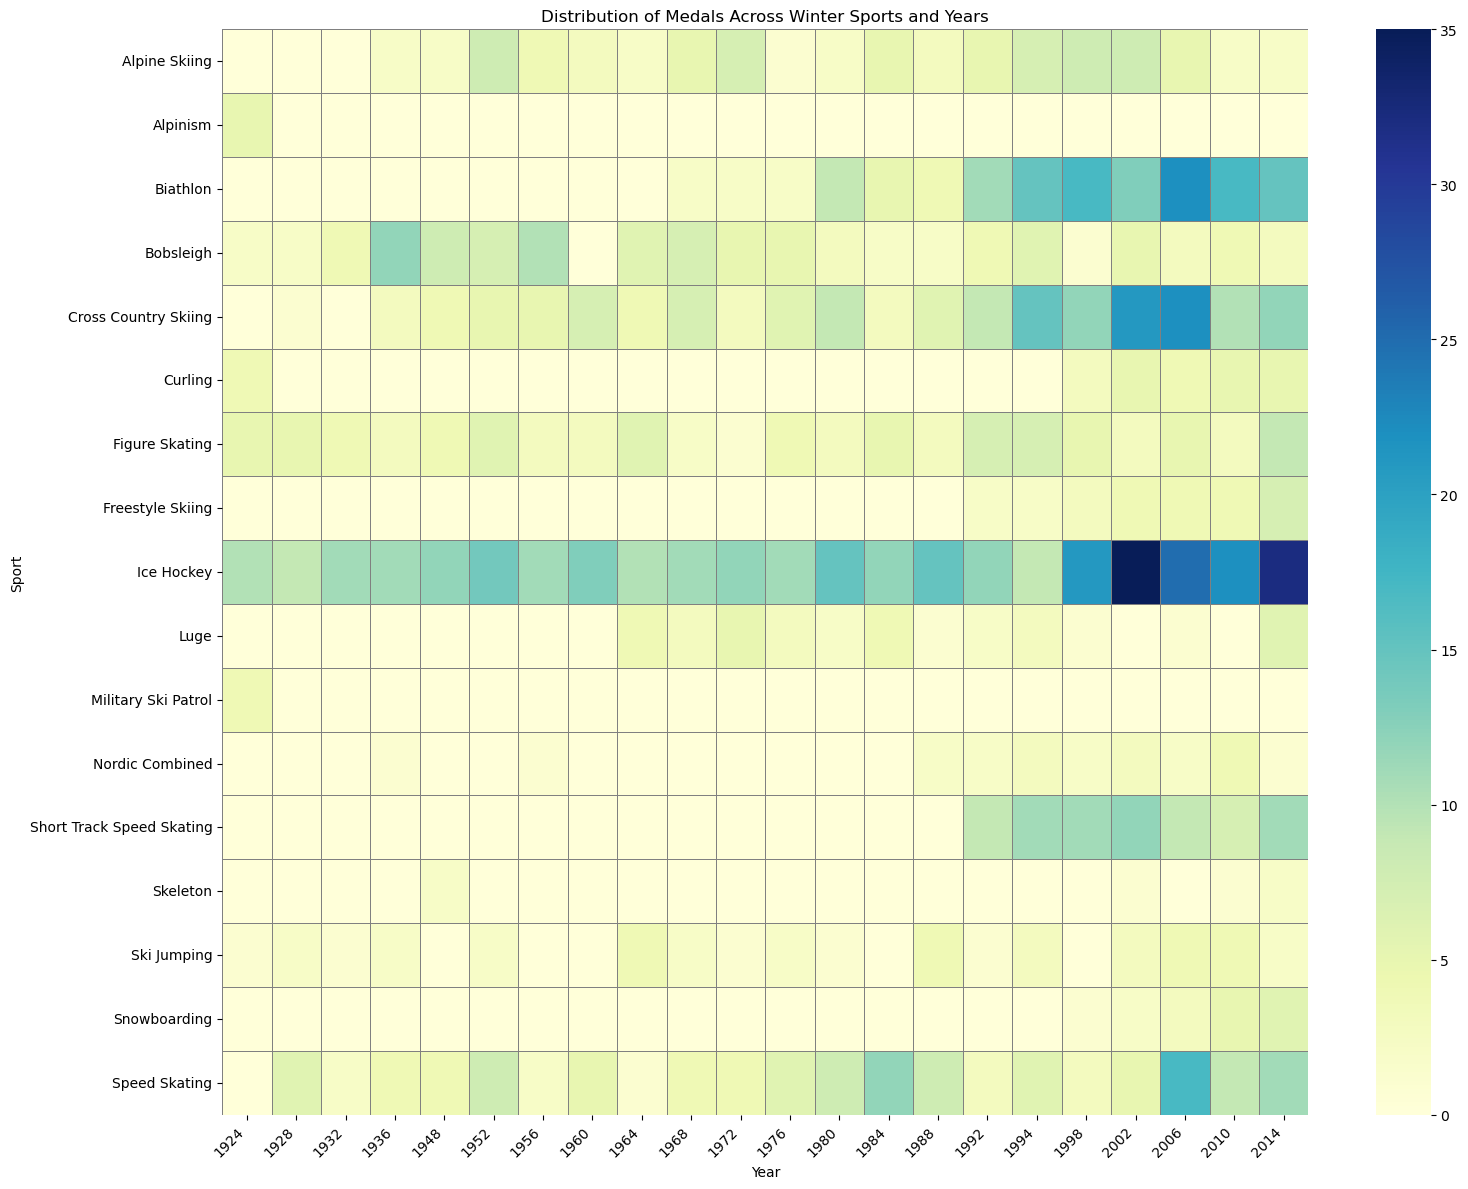

Note: Athletics refers to what is typcially known as Track & Field


In [53]:
#What sports have seen more success over time?

#Drop rows with missing Sport, Year, Medal, or Season
df_cleaned = df.dropna(subset=['Sport', 'Year', 'Medal', 'Season']).copy()

# Filter data for Summer and Winter separately
summer_data = df_cleaned[df_cleaned['Season'] == 'Summer']
winter_data = df_cleaned[df_cleaned['Season'] == 'Winter']

# number of medals by sport and year for Summer and Winter
summer_medals_by_sport_year = summer_data.groupby(['Sport', 'Year'])['Medal'].count().reset_index()
winter_medals_by_sport_year = winter_data.groupby(['Sport', 'Year'])['Medal'].count().reset_index()

#create a matrix for the heatmap for Summer and Winter
summer_heatmap_data = summer_medals_by_sport_year.pivot(index='Sport', columns='Year', values='Medal').fillna(0)
winter_heatmap_data = winter_medals_by_sport_year.pivot(index='Sport', columns='Year', values='Medal').fillna(0)

plt.figure(figsize=(16, 12))
sns.heatmap(summer_heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Distribution of Medals Across Summer Sports and Years')
plt.xlabel('Year')
plt.ylabel('Sport')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 12))
sns.heatmap(winter_heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Distribution of Medals Across Winter Sports and Years')
plt.xlabel('Year')
plt.ylabel('Sport')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


print("Note: Athletics refers to what is typcially known as Track & Field")

In [ ]:
#Summer sports with high medal numbers: Track, swimming, rowing, soccer, basketball-- lesser so is water polo, hockey, cycling
#Winter sports: hockey, biathalon, skating, cross country skiing